# Emotions classification
###### (from https://www.kaggle.com/datasets/nelgiriyewithana/emotions?resource=download) 

# Data Processing (15 marks)

### Data cleaning

#### We start by cleaning our DataFrame by removing useless columns, duplicate entries, etc.

In [1]:
import pandas as pd

data = pd.read_csv("text.csv")
data.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [2]:
data.drop(["Unnamed: 0"], axis=1, inplace=True) # useless column since pandas already provides an indexing column

if data.isnull().sum()["text"] or data.isnull().sum()["label"] == 0: # no null values in dataframe
    print("There is no null values in your DataFrame!")
else:
    print(f"There is {data.isnull().sum()} null values in your DataFrame!")

There is no null values in your DataFrame!


In [3]:
# Dropping duplicated entries in the DataFrame
n_duplicate = data.duplicated().sum()
print(f"There are {n_duplicate} duplicate entries in the DataFrame.")
data.drop_duplicates(inplace=True)
print(f"{n_duplicate} duplicate entries has been removed from the DataFrame.")

# Labels mapping
labels_mapping = {0: "Sadness", 1: "Joy", 2: "Love", 3: "Anger", 4: "Fear", 5: "Surprise"}
data["label"] = data["label"].map(labels_mapping)

print(f"Shape of the DataFrame after proprocessing: {data.shape}")
data.head()

There are 686 duplicate entries in the DataFrame.
686 duplicate entries has been removed from the DataFrame.
Shape of the DataFrame after proprocessing: (416123, 2)


,text,label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


### Text cleaning (using Regex)

#### Then, we use Regex to clean each Twitter message: remove URLs, stopwords, etc.

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean text data
def clean_text(text: pd.Series) -> pd.Series:
    """
    Takes as input a pd.Series of text (tweet) and returns
    a pd.Series of clean text (lowercase, stopwords remove, etc.)
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuation and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_text)
    

[nltk_data] Downloading package punkt to /Users/Sofiane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sofiane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Sofiane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
data["cleaned_text"] = data["text"].apply(clean_text)

data = data[["text", "cleaned_text", "label"]]

inverse_labels_mapping = {"Sadness": 0, "Joy": 1, "Love": 2, "Anger": 3, "Fear": 4, "Surprise": 5}

data["label_id"] = data["label"].map(inverse_labels_mapping)
# data.to_csv("data.csv", index=False)
data.head()

,text,cleaned_text,label,label_id
0,i just feel really helpless and heavy hearted,feel really helpless heavy hearted,Fear,4
1,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...,Sadness,0
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught,Fear,4
3,i dont know i feel so lost,dont know feel lost,Sadness,0
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...,Fear,4


### Data exploration

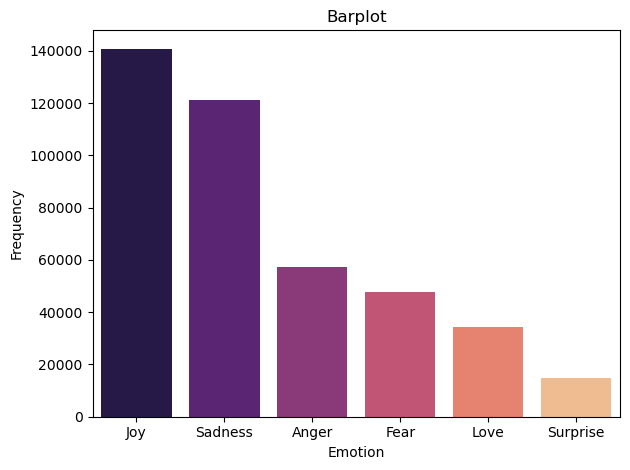

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Let's look at the distribution of emotions in the dataset:
count = data["label"].value_counts()

sns.barplot(x=count.index, y=count.values, palette="magma")
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Barplot")
plt.tight_layout()
plt.show()

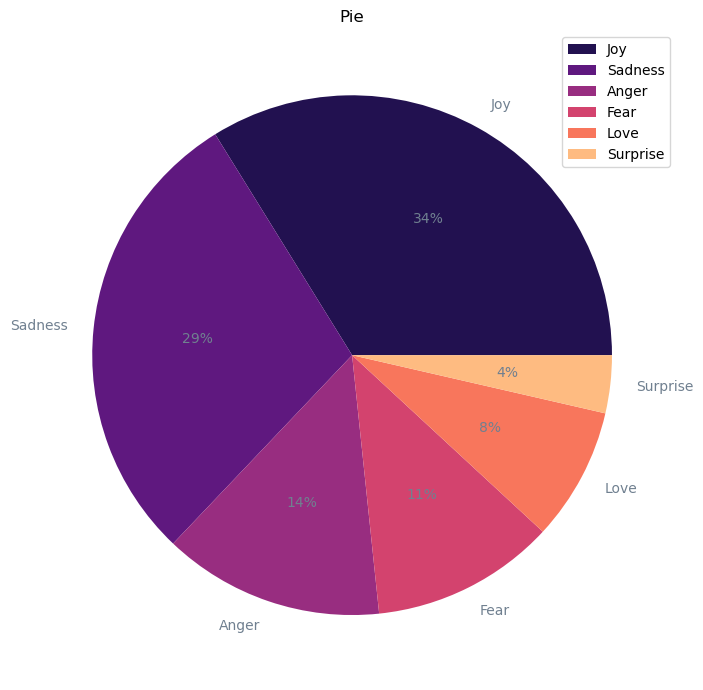

In [8]:
# same color palette than above barplot
colors = sns.color_palette('magma')[0:6]

# create pie chart
plt.figure(figsize=(12,7))
plt.pie(count.values, labels = count.index, colors = colors, autopct='%.0f%%', textprops=dict(color="slategrey"))
plt.legend(loc="upper right")
plt.title("Pie")
plt.tight_layout()
plt.show()

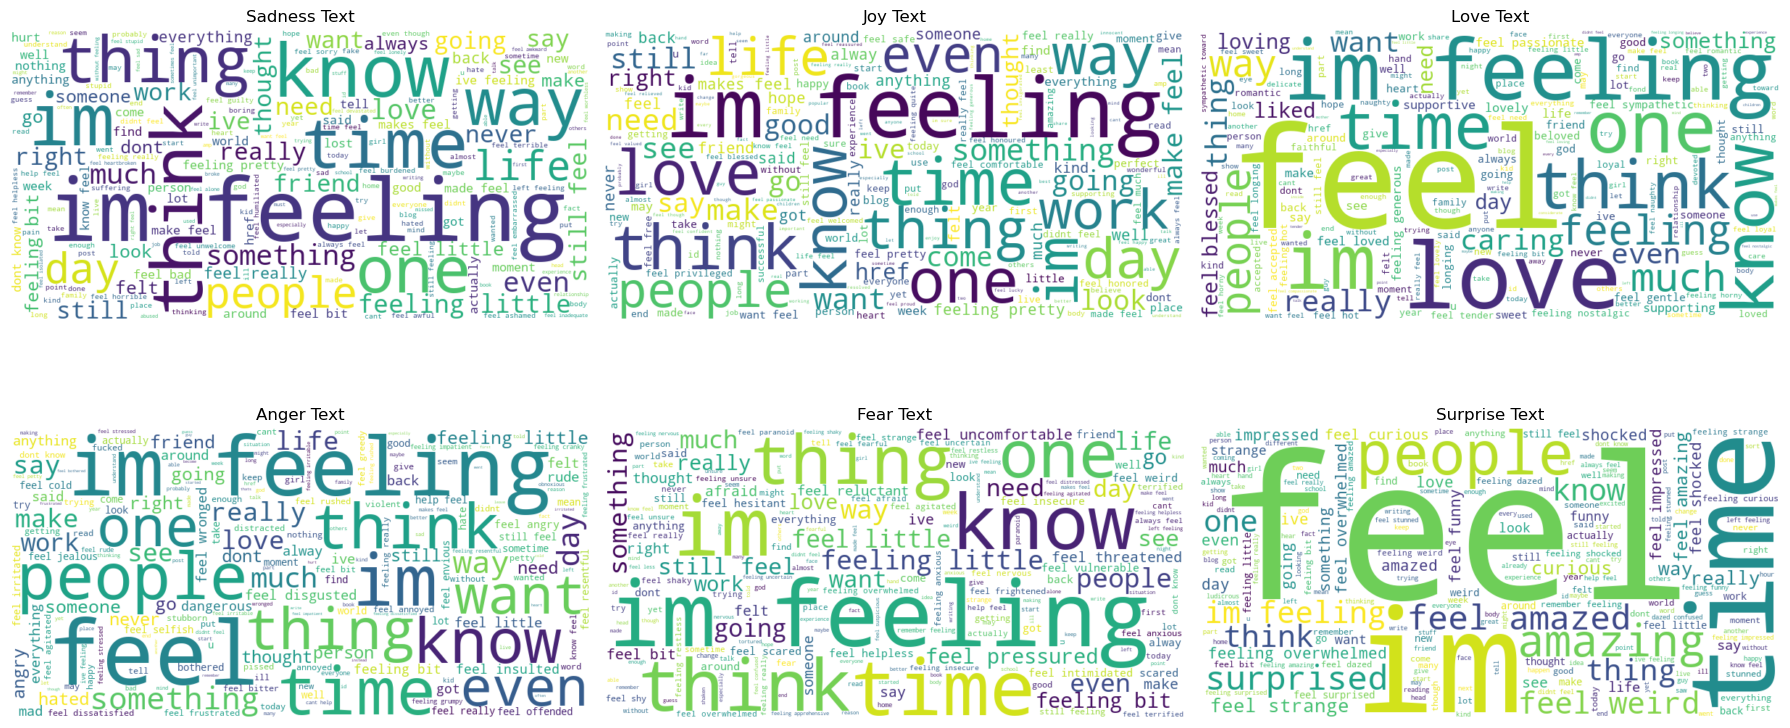

In [9]:
from wordcloud import WordCloud

# Make Seperate Data Set to Visualize text 
# Sadness
data_sadness = data[data['label']=='Sadness']
# Joy
data_joy = data[data['label']=='Joy']
# Love
data_love = data[data['label']=='Love']
# Anger
data_anger = data[data['label']=='Anger']
# Fear
data_fear = data[data['label']=='Fear']
# Surprise
data_surprise = data[data['label']=='Surprise']

# Combine text from different categories
combined_sadness_text = ' '.join(data_sadness['cleaned_text'].astype("str"))
combined_joy_text = ' '.join(data_joy['cleaned_text'].astype("str"))
combined_love_text = ' '.join(data_love['cleaned_text'].astype("str"))
combined_anger_text = ' '.join(data_anger['cleaned_text'].astype("str"))
combined_fear_text = ' '.join(data_fear['cleaned_text'].astype("str"))
combined_surprise_text = ' '.join(data_surprise['cleaned_text'].astype("str"))

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

### Featurization

#### TD-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limit number of features
    ngram_range=(1, 2)
)

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Convert the TF-IDF matrix to a dense DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df.shape)
print(tfidf_df.head())

(416123, 1000)
      able  absolutely  abused  acceptable  accepted  aching  act  actually  \
0  0.00000         0.0     0.0         0.0       0.0     0.0  0.0       0.0   
1  0.24175         0.0     0.0         0.0       0.0     0.0  0.0       0.0   
2  0.00000         0.0     0.0         0.0       0.0     0.0  0.0       0.0   
3  0.00000         0.0     0.0         0.0       0.0     0.0  0.0       0.0   
4  0.00000         0.0     0.0         0.0       0.0     0.0  0.0       0.0   

   actually feel  admit  ...  wrong  wronged  www  year  years  yes  \
0            0.0    0.0  ...    0.0      0.0  0.0   0.0    0.0  0.0   
1            0.0    0.0  ...    0.0      0.0  0.0   0.0    0.0  0.0   
2            0.0    0.0  ...    0.0      0.0  0.0   0.0    0.0  0.0   
3            0.0    0.0  ...    0.0      0.0  0.0   0.0    0.0  0.0   
4            0.0    0.0  ...    0.0      0.0  0.0   0.0    0.0  0.0   

   yesterday  yet  young  youre  
0        0.0  0.0    0.0    0.0  
1        0.0  0

#### Word2Vec

In [11]:
from gensim.models import Word2Vec
import numpy as np

# split each Twitter message into single words
sentences = [row.split() for row in data['cleaned_text']]

# Train a Word2Vec model: we use vectors dimensionality of 100
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to convert text to a vector
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    if not doc:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word2vec_model.wv[doc], axis=0)

# Apply the function to each cleaned Twitter message
data['vector'] = data['cleaned_text'].apply(lambda x: document_vector(word2vec_model, x))
print(data["vector"].shape)

(416123,)


In [12]:
print("10 words most similar to the word 'unhappy' \nin feature space using cosine similarity: \n")
word2vec_model.wv.most_similar(positive=["unhappy"])

10 words most similar to the word 'unhappy' 
in feature space using cosine similarity: 



[('depressed', 0.788360059261322),
 ('dissatisfied', 0.7613182663917542),
 ('unimportant', 0.7490850687026978),
 ('discontent', 0.7479753494262695),
 ('miserable', 0.7335628271102905),
 ('distressed', 0.7208617329597473),
 ('shitty', 0.6982877254486084),
 ('troubled', 0.682513952255249),
 ('discouraged', 0.6770995855331421),
 ('distraught', 0.6727532148361206)]

# Models training (5 marks)

### Dimensionality reduction

##### We reduce the dimensionality of our feature vectors: (TFIDF: 1000 -> 100) and (Word2Vec: 100 -> 50) using PCA

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline_word2vec = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=50))])
pipeline_tfidf = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=100))])

# Word2Vec features vectors
vectors = np.array(data['vector'].tolist())
word2vec_reduced_vectors = pipeline_word2vec.fit_transform(vectors)
print(f"Shape of Word2Vec feature vectors: {word2vec_reduced_vectors.shape}")

# TD-IDF features vectors
tf_idf_vectors = np.array(tfidf_df)
tf_idf_reduced_vectors = pipeline_tfidf.fit_transform(tf_idf_vectors)
print(f"Shape of TF-IDF features vectors: {tf_idf_reduced_vectors.shape}")

Shape of Word2Vec feature vectors: (416123, 50)
Shape of TF-IDF features vectors: (416123, 100)


### Train/Validation/Test split

In [15]:
from sklearn.model_selection import train_test_split

# For Word2Vec featurization method
X_word2vec = word2vec_reduced_vectors  # Features of dimension (N_samples, 50)
y = data['label_id']  # Target variable

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(
    X_word2vec, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train set shape: {X_train_word2vec.shape}")
print(f"Train set shape: {X_test_word2vec.shape}")

Train set shape: (332898, 50)
Train set shape: (83225, 50)


In [42]:
from sklearn.model_selection import train_test_split

# For TD-IDF featurization method
X_tfidf = tf_idf_reduced_vectors  # Features
y = data['label_id']  # Target variable

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train set shape: {X_train_tfidf.shape}")
print(f"Train set shape: {X_test_tfidf.shape}")

Train set shape: (332898, 100)
Train set shape: (83225, 100)


# Models training, validation and evaluation (5 marks)

## Random Forest

### Random Forest using TF-IDF features vectors

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Initialize the grid search model
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',  
    cv=5,  
    verbose=1,  
    n_jobs=-1
)  

# Fit the grid search to the data
rf_clf_tdidf = grid_search.fit(X_train_tfidf, y_train_tfidf) # Random Forest classifier using TF-IDF featurization method

# Print the best parameters and the corresponding score
print("Best parameters found: ", rf_clf_tdidf.best_params_)
print("Best accuracy found: ", rf_clf_tdidf.best_score_)

# Use the best model to make predictions and calculate performance on the test set
y_pred_tfidf = rf_clf_tdidf.best_estimator_.predict(X_test_tfidf)
classification_rep = classification_report(y_test_tfidf, y_pred_tfidf)

print("Classification Report for Random Forest model trained on TFIDF features vectors: ")
print(classification_rep)
# Classification report display below after saving the model 

In [27]:
from joblib import dump
dump(rf_clf_tdidf, 'rf_clf_tdidf.joblib') 

['rf_clf_tdidf.joblib']

In [43]:
from joblib import load
rf_clf_tfidf = load("rf_clf_tdidf.joblib")

y_pred_tfidf = rf_clf_tfidf.predict(X_test_tfidf)
classification_rep = classification_report(y_test_tfidf, y_pred_tfidf)

print("Classification Report for Random Forest model trained on TF-IDF features vectors: ")
print(classification_rep)

Classification Report for Random Forest model trained on TF-IDF features vectors: 
              precision    recall  f1-score   support

           0       0.53      0.70      0.60     24121
           1       0.56      0.75      0.64     28220
           2       0.40      0.17      0.24      6824
           3       0.60      0.25      0.35     11448
           4       0.52      0.25      0.33      9574
           5       0.28      0.12      0.17      3038

    accuracy                           0.54     83225
   macro avg       0.48      0.37      0.39     83225
weighted avg       0.53      0.54      0.50     83225



### Random Forest using Word2Vec features vectors

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Initialize the grid search model
grid_search_word2vec = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',  
    cv=5,  
    verbose=1,  
    n_jobs=-1
)  

# Fit the grid search to the data
rf_clf_word2vec = grid_search_word2vec.fit(X_train_word2vec, y_train_word2vec) # Random Forest classifier using TF-IDF featurization method

# Print the best parameters and the corresponding score
print("Best parameters found: ", rf_clf_word2vec.best_params_)
print("Best accuracy found: ", rf_clf_word2vec.best_score_)

# Use the best model to make predictions and calculate performance on the test set
y_pred_word2vec = rf_clf_word2vec.best_estimator_.predict(X_test_word2vec)
classification_rep = classification_report(y_test_word2vec, y_pred_word2vec)
# Classification report display below after saving the model

In [26]:
from joblib import dump
dump(rf_clf_word2vec, 'rf_clf_word2vec.joblib') 

['rf_clf_word2vec.joblib']

In [38]:
from joblib import load
rf_clf_word2vec = load("rf_clf_word2vec.joblib")

y_pred_word2vec = rf_clf_word2vec.predict(X_test_word2vec)
classification_rep = classification_report(y_test_word2vec, y_pred_word2vec)

print("Classification Report for Random Forest model trained on Word2Vec features vectors: ")
print(classification_rep)

Classification Report for Random Forest model trained on Word2Vec features vectors: 
              precision    recall  f1-score   support

           0       0.59      0.77      0.67     24121
           1       0.64      0.81      0.72     28220
           2       0.40      0.19      0.26      6824
           3       0.64      0.33      0.44     11448
           4       0.55      0.33      0.41      9574
           5       0.22      0.08      0.12      3038

    accuracy                           0.60     83225
   macro avg       0.51      0.42      0.44     83225
weighted avg       0.58      0.60      0.57     83225



## Gradient Boosting

### Gradient Boosting using TF-IDF features vectors

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf_tfidf = GradientBoostingClassifier(n_estimators=100, random_state=42) 
gb_clf_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Gradient boosting Performance
y_pred_gb_tfidf = gb_clf_tfidf.predict(X_test_tfidf)
classification_rep = classification_report(y_test_tfidf, y_pred_gb_tfidf)

print("Classification Report for Gradient Boosting model trained on TDIDF features vectors: ")
print(classification_report(y_test_tfidf, y_pred_gb_tfidf))

Classification Report for Gradient Boosting model trained on TDIDF features vectors: 
              precision    recall  f1-score   support

           0       0.51      0.66      0.58     24121
           1       0.56      0.78      0.65     28220
           2       0.60      0.24      0.34      6824
           3       0.64      0.23      0.34     11448
           4       0.59      0.28      0.38      9574
           5       0.51      0.22      0.31      3038

    accuracy                           0.55     83225
   macro avg       0.57      0.40      0.43     83225
weighted avg       0.56      0.55      0.52     83225



In [25]:
from joblib import dump
dump(gb_clf_tfidf, 'gb_clf_tfidf.joblib') 

['gb_clf_tfidf.joblib']

### Gradient Boosting using Word2Vec features vectors

In [22]:
gb_clf_word2vec = GradientBoostingClassifier(n_estimators=100, random_state=42) 
gb_clf_word2vec.fit(X_train_word2vec, y_train_word2vec)

# Gradient boosting Performance
y_pred_gb_word2vec = gb_clf_word2vec.predict(X_test_word2vec)
classification_rep = classification_report(y_test_word2vec, y_pred_gb_word2vec)

print("Classification Report for Gradient Boosting model trained on Word2Vec features vectors: ")
print(classification_report(y_test_word2vec, y_pred_gb_word2vec))

Classification Report for Gradient Boosting model trained on Word2Vec features vectors: 
              precision    recall  f1-score   support

           0       0.60      0.77      0.67     24121
           1       0.66      0.85      0.74     28220
           2       0.59      0.23      0.33      6824
           3       0.66      0.38      0.48     11448
           4       0.62      0.40      0.48      9574
           5       0.55      0.17      0.26      3038

    accuracy                           0.63     83225
   macro avg       0.61      0.47      0.50     83225
weighted avg       0.63      0.63      0.61     83225



In [24]:
from joblib import dump
dump(gb_clf_word2vec, 'gb_word2vec.joblib') 

['gb_word2vec.joblib']

## Logistic Regression

### Logistic Regression using TFIDF features vectors (use full 1000 here dimension)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# For TD-IDF featurization method
X_tfidf = tf_idf_vectors  # Features of dimension 1000
y = data['label_id']  # Target variable

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, 
    y, 
    test_size=0.2, 
    random_state=42
)

print(f"Train set shape: {X_train_tfidf.shape}")
print(f"Train set shape: {X_test_tfidf.shape}")

lr_param_grid = {
    'C': [0.1, 1, 5],  
}

log_reg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

log_reg.fit(X_train_tfidf, y_train_tfidf)

y_pred_lr_tfidf = log_reg.predict(X_test_tfidf)
print("Classification Report on Test Set for Logistic Regression using TDIDF features: ")
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))

Train set shape: (332898, 1000)
Train set shape: (83225, 1000)
Classification Report on Test Set for Logistic Regression using TDIDF features: 
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     24121
           1       0.82      0.93      0.87     28220
           2       0.83      0.70      0.76      6824
           3       0.89      0.77      0.83     11448
           4       0.85      0.76      0.80      9574
           5       0.80      0.66      0.72      3038

    accuracy                           0.85     83225
   macro avg       0.85      0.79      0.81     83225
weighted avg       0.85      0.85      0.85     83225



In [35]:
from joblib import dump
dump(log_reg, 'lr_full_tfidf.joblib') 

['lr_full_tfidf.joblib']

## SVM: not run here because computationnaly expensive (cf. write-up for justification) 

In [ ]:
# from sklearn.svm import SVC

# svm_model = SVC(kernel='linear')  # Using a linear kernel
# svm_model.fit(X_train, y_train)

# # SVM Performance
# svm_predictions = svm_model.predict(X_test)
# print("SVM Classifier Performance:")
# print(classification_report(y_test, svm_predictions))

# Model(s) assessment (5 marks)

### Confusion matrix for the best Gradient Boosting model 

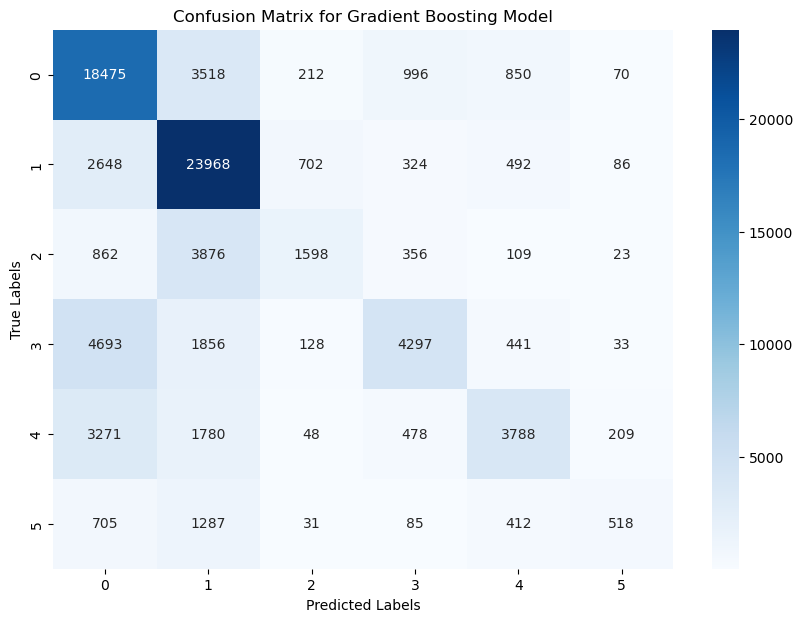

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(y_test_word2vec, y_pred_gb_word2vec)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_word2vec), yticklabels=np.unique(y_test_word2vec))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

### Confusion matrix for the best Logistic Regression model

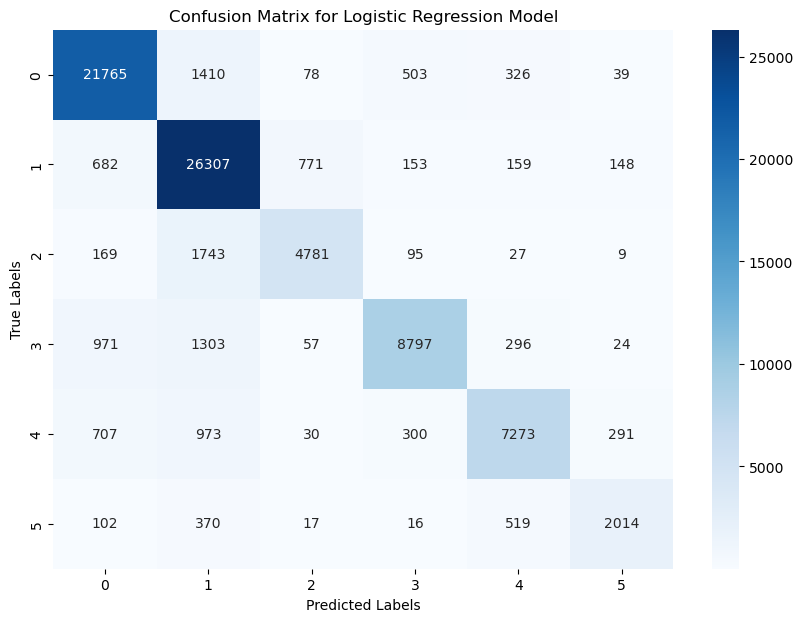

In [36]:
cm = confusion_matrix(y_test_tfidf, y_pred_lr_tfidf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_tfidf), yticklabels=np.unique(y_test_tfidf))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()